<a href="https://colab.research.google.com/github/drewm8080/Analyzing-COVID-19-Data-Sources/blob/main/CDC_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**User Input Here**

In [ ]:
print('Welcome to CDC Statistics')
print('')
print('Please tell me which state you would like to see. Type abbreivated name of state in caps. EX: FL,GA etc.')
userinput = input('Please put state here:')

Welcome to CDC Statistics

Please tell me which state you would like to see. Type abbreivated name of state in caps. EX: FL,GA etc.
Please put state here:CA


**Framework for Cases and Deaths from The COVID-19 Tracking Project**

In [ ]:
# might need this cell if your data does not download directly from the URL
# !pip install fsspec
# !pip install pandas
# !pip3 install mpld3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# reading in the data
df = pd.read_csv('https://data.cdc.gov/api/views/9mfq-cb36/rows.csv?accessType=DOWNLOAD')

In [ ]:
df = df.loc[:,['submission_date','state','tot_cases','tot_death']]

In [ ]:
df['cases'] = df.tot_cases
df['deaths'] = df.tot_death
df['date'] = df.submission_date

In [ ]:
df = df.drop(columns=['tot_cases','tot_death','submission_date'])

In [ ]:
df = df[df.state == userinput]

In [ ]:
# cleaning data
df = df.reset_index(drop = True)

In [ ]:
# setting datetime index 
df.date = pd.to_datetime(df.date)

In [ ]:
# cleaning data
df = df.sort_values(by = 'date', ascending=True)

In [ ]:
# cleaning data
df = df.reset_index(drop = True)

In [ ]:
# making sure the data starts after 03-01-2020
df = df[df.date >= '2020-03-01']

In [ ]:
# creating day column for each date 
df['Day'] = df.groupby('state')['date'].rank(ascending=True)


In [ ]:
# cleaning data
df = df.reset_index(drop = True)

In [ ]:
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of case'] = df.loc[:,'Day']

In [ ]:
# calulating Avgerage day of case
for i in range(1, len(df)):
  x = (((df.loc[i, 'cases'] - df.loc[i-1, 'cases']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of case'])) / (df.loc[i, 'cases'])) + (df.loc[i-1, 'Avg day of case'])
  df.loc[i, 'Avg day of case'] = round(x, 2)

In [ ]:
# making sure it only calculate where the deaths >0
df = df[df['deaths'] > 0]

In [ ]:
# setting the first day as the first row in Avg day of death
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of death'] = df.loc[:,'Day']

In [ ]:
# cleaning data
df = df.reset_index(drop = True)

In [ ]:
# calulating Avgerage day of death
for i in range(1, len(df)):
  x = (((df.loc[i, 'deaths'] - df.loc[i-1, 'deaths']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of death'])) / (df.loc[i, 'deaths'])) + (df.loc[i-1, 'Avg day of death'])
  df.loc[i, 'Avg day of death'] = round(x, 2)

In [ ]:
# creating the CDF Column
df['cdf_cases'] = df['cases']

In [ ]:
# creating the cdf column
df['cdf_deaths'] = df['deaths']

In [ ]:
# creating the formula for the CDF column
df.loc[:,'cdf_cases':] = df.loc[:,'cdf_cases':].div(df.iloc[-1]['cdf_cases':])
df = df.reset_index(drop = True)

In [ ]:
# creating the formula for the CDF column
df['cdf_deaths'] = df.loc[:,'cdf_deaths':].div(df.iloc[-1]['cdf_deaths':])

In [ ]:
# difference of avg death day and avg case day
df['Avg Death Day - Avg Case Day'] = df['Avg day of death'] - df['Avg day of case'] 

In [ ]:
# avg day of case/ current day
df['Avg Day of Case/ Current Day'] = df['Avg day of case'] / df['Day']

In [ ]:
# avg day of death/ current day
df['Avg Day of Death/ Current Day'] = df['Avg day of death'] / df['Day']

In [ ]:
df

,state,cases,deaths,date,Day,Avg day of case,Avg day of death,cdf_cases,cdf_deaths,Avg Death Day - Avg Case Day,Avg Day of Case/ Current Day,Avg Day of Death/ Current Day
0,CA,45,1,2020-03-05,5.0,2.82,5.00,1.25686e-05,1.70902e-05,2.18,0.564000,1.000000
1,CA,56,1,2020-03-06,6.0,3.44,5.00,1.56409e-05,1.70902e-05,1.56,0.573333,0.833333
2,CA,56,1,2020-03-07,7.0,3.44,5.00,1.56409e-05,1.70902e-05,1.56,0.491429,0.714286
3,CA,110,1,2020-03-08,8.0,5.68,5.00,3.07232e-05,1.70902e-05,-0.68,0.710000,0.625000
4,CA,135,2,2020-03-09,9.0,6.29,7.00,3.77058e-05,3.41804e-05,0.71,0.698889,0.777778
...,...,...,...,...,...,...,...,...,...,...,...,...
391,CA,3568426,57936,2021-03-31,396.0,266.97,274.77,0.996669,0.990139,7.80,0.674167,0.693864
392,CA,3570660,58090,2021-04-01,397.0,267.05,275.09,0.997293,0.992771,8.04,0.672670,0.692922
393,CA,3573074,58269,2021-04-02,398.0,267.14,275.47,0.997968,0.99583,8.33,0.671206,0.692136
394,CA,3577951,58404,2021-04-03,399.0,267.32,275.76,0.99933,0.998137,8.44,0.669975,0.691128


 **Statistics**

In [ ]:
# creating framework for statistics
averagedayofcase = df['Avg day of case'].iloc[-1]
averagedayofdeath = df['Avg day of death'].iloc[-1]
differDeaths = df['Avg Death Day - Avg Case Day'].max()
differCases= -df['Avg Death Day - Avg Case Day'].min()

In [ ]:
print('COVID-19 STATISTICS')
print('')
print('State = ', df.state.iloc[-1])
print('Average Day of Death and Average Day of Case as of',df['date'].iloc[-1])
print('Case =', averagedayofcase)
print('Death = ', averagedayofdeath)
print('Days When Average Dates of Death Differ By Largest Amounts')
print('Death Day – Case Day =', differDeaths)
print('Case Day - Death Day =',differCases)

COVID-19 STATISTICS

State =  CA
Average Day of Death and Average Day of Case as of 2021-04-04 00:00:00
Case = 267.41
Death =  275.99
Days When Average Dates of Death Differ By Largest Amounts
Death Day – Case Day = 8.579999999999984
Case Day - Death Day = 45.53


**Data Visualization**

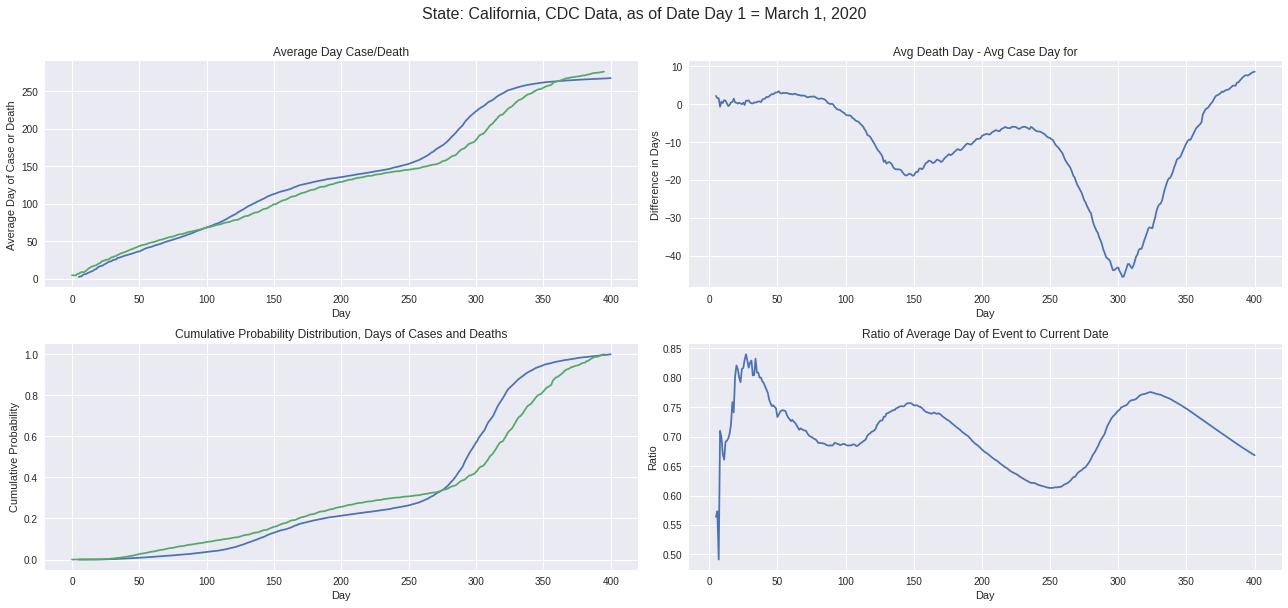

In [ ]:
plt.figure(figsize = (18,8))

plt.subplot(2,2,1)
plt.plot(df['Day'], df['Avg day of case'],df['Avg day of death'])
plt.title('Average Day Case/Death')
plt.xlabel('Day')
plt.ylabel('Average Day of Case or Death')

plt.subplot(2,2,2)
plt.plot(df['Day'], df['Avg Death Day - Avg Case Day'])
plt.title('Avg Death Day - Avg Case Day for')
plt.xlabel('Day')
plt.ylabel('Difference in Days')

plt.subplot(2,2,3)
plt.plot(df['Day'],df['cdf_cases'],df['cdf_deaths'])
plt.title('Cumulative Probability Distribution, Days of Cases and Deaths')
plt.xlabel('Day')
plt.ylabel('Cumulative Probability')

plt.subplot(2,2,4)
plt.plot(df['Day'], df['Avg Day of Case/ Current Day'])
plt.title('Ratio of Average Day of Event to Current Date')
plt.xlabel('Day')
plt.ylabel('Ratio')



plt.suptitle('CDC Data, as of Date Day 1 = March 1, 2020', size= 16,y=1.05)
plt.tight_layout()

plt.style.use('seaborn')